## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
# I import all the libraries I will be using on this project
import pandas as pd # Pandas to manipulate the dataframes
import numpy as np # Numpy to manipulate the arrays and to compute
import random # Random to generate random numbers
import matplotlib.pyplot as plt # Matplotlib to plot charts
# I use the matplotlib inline to plot the charts in the notebooks
%matplotlib inline 
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
# I open the 'ab_data.csv' file and I store it in 'df'
file = 'ab_data.csv'
df = pd.read_csv(file)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
# I check the shape of the dataset
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
# I look at the number of unique users
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
# I look at the proportion of converted users
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
# I check at the rows where the new_ge and treatment don't line up
df.query('group == "treatment" and landing_page == "old_page" or group == "control" and landing_page == "new_page"').user_id.count()

3893

f. Do any of the rows have missing values?

In [9]:
# I look at the missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# I create a new dataframe (df2) without 
# The treatment pages which are not aligned with new_page 
# And the control pages which are not aligned with old_page
df2 = df.drop(labels=df.query('group == "treatment" and landing_page == "old_page" or group == "control" and landing_page == "new_page"').index)

In [11]:
# Double check if all of the incorrect rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
# I look at the number of unique users
df2.user_id.nunique()

290584

In [13]:
# I look at the shape of the dataset
df2.shape

(290585, 5)

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
# One user is duplicated, so I look for him
df2[df2.user_id.duplicated() == True].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
# I look at the information about the duplicated user (#773192)
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# I drop the second duplicated line
df2.drop(df2[df2.index == 2893].index, inplace = True)
# I double check the duplicated users and the new shape of the dataframe
print(df2.user_id.duplicated().sum())
print(df2.shape)

0
(290584, 5)


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# I look at the proportion of converted users
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# I look at the proportion of converted users in the control group
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# I look at the proportion of converted users in the treatment group
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
# I look at the probability for a user to land on the new page
df2[df2['landing_page'] == 'new_page'].count() / df2.shape[0]

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<p>On average, users have 50% chance to land on the "new page" and looking at the proportion of users who convert, there are more users from the "old page" who convert.</p>
<p>This can be true, but I study a sample of all the users who visit the web site, so this result can be found by chance. I will need to run a sampling distribution to have more evidence to say that the new treatment page leads to more conversions.</p>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<p>H0 : The old page is better : p<sub>new</sub> - p<sub>old</sub> <= 0 </p>
<p>H1 : The new page is better : p<sub>new</sub> - p<sub>old</sub> > 0</p>
<p>alpha = 0.05</p>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
# I compute the rate of converted users on the new page
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
# I compute the rate of converted users on the old page
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
# I compute the number of converted users on the new page
n_new = df2.query('landing_page == "new_page"').user_id.count()
n_new

145310

d. What is $n_{old}$?

In [24]:
# I compute the number of converted users on the old page
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# I simulate n_new transactions with a convert rate of p_new
new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
# I simulate n_old transactions with a convert rate of p_old
old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
# I compute the difference in rate means
new_page_converted.mean() - old_page_converted.mean()

0.0008857355850784843

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
# I simulate 10000 differences of rate means and I store these differences in 'p_diffs'
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new) # I simulate the n users landong on the new page having p chance to convert
    old_page_converted = np.random.binomial(1, p_old, n_old) # I simulate the n users landong on the old page having p chance to convert
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean()) # I store the means difference in p_diffs
p_diffs = np.array(p_diffs) # I change the p_diffs array type to a numpy array type

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

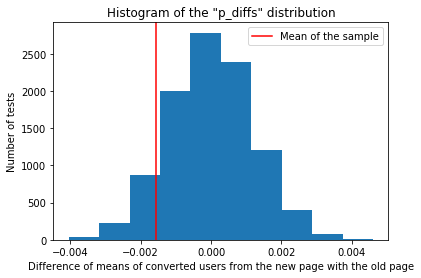

In [29]:
# I compute the difference of means of our data
sample_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()

# I plot the difference in rate means and the actual difference of means of our data 
plt.hist(p_diffs)
# I display the observed difference mean on the sample
plt.axvline(sample_diff, color='r', label='Mean of the sample')
plt.title('Histogram of the "p_diffs" distribution')
plt.xlabel('Difference of means of converted users from the new page with the old page')
plt.ylabel('Number of tests')
plt.legend()
plt.show()

<p>As expected, with p_new and p_old having the same convert rate, the probability to have a difference in rates means is higher around 0. The simulations follow a normal distribution around 0. </p>

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# I look at the proportion of values above the difference of the sample
(p_diffs > sample_diff).mean()

0.9063

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<p>I computed the proportion of simulations above the mean of the sample observed in the ab_data.csv file. This value is called the p-value, this is the probability of observing the data or something more extreme in favor of the alternative given the null hypothesis is true.</p>
<p>Here, I observe 90.85% of the computed values are above the sample difference, so 9.15% of the computed values are equal or under the sample difference. Our Alpha is 5% so I failed to reject the null hypothesis.</p>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
# I import statsmodels.api to perform statistical tests
import statsmodels.api as sm

# I set the values I will use in the ztest
convert_old = df2.query('landing_page == "old_page"').converted.sum()
convert_new = df2.query('landing_page == "new_page"').converted.sum()
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_new = df2.query('landing_page == "new_page"').user_id.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
# I perform the ztest
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print('z-score : ' + str(z_score),'\np-value : ' + str(p_value))

z-score : -1.3109241984234394 
p-value : 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<p>As the Alpha is 5%, the z-score threshold no the negative side of the normal distribution is -1.645.</p>
<p>The p-value matches to the difference of the observered sample and the z-score (-1.31) is above the threshold, so once again, I failed to reject the null hypothesis.</p>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<p>Since I need to predict a categorical response (converted or not converted), I need to use a logistic regression.</p>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
# I create an 'Intercept' column to perform the regression model and I add dummies columns as well :
# 'control', 'ab_page'from the previous 'group' column
df2['intercept'] = 1
df2[['control','ab_page']] = pd.get_dummies(df2.group)

In [34]:
# I drop the 'control' column which is useless for my study
df2.drop(columns = 'control', inplace = True)

In [35]:
# I check my new dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
# I create my logistic regression model
model = sm.Logit(df2.converted, df2[['intercept','ab_page']])
# And I fit it to see the result
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
# I show the result of the logistic regression
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        03:33:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [38]:
np.exp(-0.0150)

0.9851119396030626

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<p>For the ab_page, I have a new p-value = 0.190 which is different from the Part II p-value 0.095.</p>
<p>In this logistic regression model, we look at the 2 possible outcomes : the user will convert or not.<br>So the null and alternative hypothesis are different from the previous part : <br>U0 : p<sub>new</sub> - p<sub>old</sub> = 0<br>U1 : p<sub>new</sub> - p<sub>old</sub> != 0</p>
<p>Because the new hypothesis, the one-tail test I was performing became a two-tail test, which explain the ratio of 2 between the p-values.</p>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<p>It is a good idea to consider other factors in the study to be able to make better and more precise predictions.</p>
<p>Adding more variables to the regression model can mislead the predictions and it can  :</p>
<ul>
    <li>Non-linearity of the response-predictor relationships</li>
    <li>Correlation of error terms</li>
    <li>Non-constant Variance and Normally Distributed Errors</li>
    <li>Outliers/ High leverage points</li>
    <li>Multicollinearity</li>
</ul>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
# I load the 'countries.csv' file as 'countries_df' 
countries_df = pd.read_csv('./countries.csv')
# I join the country_df with the df2 dataframe in a new dataframe 'df_new'
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
# I check the new dataframe
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
# I create dummies from the countries and I add them in the new dataframe
df_new[['CA','UK','US']] = pd.get_dummies(df_new.country)

In [41]:
# I build the logistic regression model for the contries
model_country = sm.Logit(df_new.converted, df_new[['intercept','CA','UK']])
# I fit the regression model
result_country = model_country.fit()
# I summarize the regression model result
result_country.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 09 May 2019   Pseudo R-squ.:               1.521e-05
Time:                        03:33:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [42]:
np.exp(-0.0408), np.exp(0.0099)

(0.9600211149716509, 1.0099491671175422)

<p>In this logistic regression summary, I observe a p-value for 'CA' = 0.129 and 'UK' = 0.456. They are above Alpha = 0.05 so they are statistically significants. With the 'US' as a baseline, the 'CA' is increasing 0.96 time more and the 'UK' is incresing 1.00 times more than the 'US'.</p>
<p>Since the coefficients for the countries are different, I will need to see the interaction between the countries and the ab_page.</p>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
# I create interaction columns between 'CA' and 'ab_page' columns and between 'UK' and 'ab_page'
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
# I check the dataframe
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CA_ab_page,UK_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


In [44]:
# I build the logistic regression model for all the factors
model_all_factors = sm.Logit(df_new.converted, df_new[['intercept','ab_page','CA','UK','CA_ab_page','UK_ab_page']])
# I fit the regression model
result_all_factors = model_all_factors.fit()
# I summarize the regression model result
result_all_factors.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 09 May 2019   Pseudo R-squ.:               3.482e-05
Time:                        03:33:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [45]:
print('ab_page coef = ' + str(np.exp(-0.0206)),
      '\nCA coef = ' + str(np.exp(-0.0175)),
      '\nUK coef = ' + str(np.exp(-0.0057)),
      '\nIntersection CA * ab_page coef = ' + str(np.exp(-0.0469)),
      '\nIntersection UK * ab_page coef = ' + str(np.exp(0.0314)))

ab_page coef = 0.9796107305032505 
CA coef = 0.9826522356650732 
UK coef = 0.9943162141784332 
Intersection CA * ab_page coef = 0.9541828111007262 
Intersection UK * ab_page coef = 1.0318981806179213


<p>All the p-values are statistically significants(>0.05).</p>
<p>Using the US and the old page as baseline, I can compare the coefficients for each variable.</p>
<ul>
    <li>ab_page coef without the interaction = 0.9851 | ab_page coef with the interaction = 0.9796</li>
    <li>CA coef without the interaction = 0.9600 | CA coef with the interaction = 0.9826</li>
    <li>UK coef without the interaction = 1.0099 | UK coef with the interaction = 0.9943</li>
</ul>
<p>There isn't a great difference between the coefficients with and without the intersection but according to the formulas of the prediction of the conversion rate with the US and the old page as baseline below, the interactions are necessary to have a better prediction of the conversion rate per country.</p>
<ul>
    <li>y<sub>in CA</sub> = intercept coef + ab_page coef * x<sub>1</sub> + CA coef * x<sub>2</sub> + CA_ab_page coef * x<sub>3</sub></li>
    <li>y<sub>in UK</sub> = intercept coef + ab_page coef * x<sub>1</sub> + UK coef * x<sub>2</sub> + UK_ab_page coef * x<sub>3</sub></li>
</ul>

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.